In [1]:
import pandas as pd
import math
import numpy as np
from geopy import distance

In [2]:
df=pd.read_excel('QC-KPIs.xlsx',engine='openpyxl',sheet_name='Sheet1',index_col=0)

In [3]:
df.head()

,machine_id,event_id,events_name1,StartDate,start,start_latitude,start_longitude,events_name2,stop,stop_latitude,stop_longitude,Elapsed_Sec,distance,ItemCount,Weight (Tons)
Sno,,,,,,,,,,,,,,,
0,QC001,930,PICK,2021-03-01,2021-03-01 00:09:17.737,-37.66171,176.16986,PLACE,2021-03-01 00:12:45.736000,-37.65978,176.17058,207.999,0.2234,1,36
1,QC001,931,PICK,2021-03-01,2021-03-01 00:19:28.734,-37.66162,176.16988,PLACE,2021-03-01 00:22:36.735000,-37.66371,176.16962,188.001,0.2331,1,27
2,QC001,932,PICK,2021-03-01,2021-03-01 00:27:40.736,-37.66180,176.16984,PLACE,2021-03-01 00:32:08.734001,-37.66428,176.17333,267.998,0.4130,1,37
3,QC001,933,PICK,2021-03-01,2021-03-01 00:36:53.733,-37.66216,176.16977,PLACE,2021-03-01 00:39:10.736000,-37.66344,176.17103,137.003,0.1804,1,37
4,QC001,934,PICK,2021-03-01,2021-03-01 00:42:01.736,-37.66665,176.17189,PLACE,2021-03-01 00:46:15.737000,-37.66219,176.16977,254.001,0.5292,1,38


In [4]:
def distCalc(df):
    dist=[]
    for i in range(df.shape[0]):
        point1=(df.loc[i,'start_latitude'],df.loc[i,'start_longitude'])
        point2=(df.loc[i,'stop_latitude'],df.loc[i,'stop_longitude'])
        dist.append(round(distance.distance(point1, point2).km,4))
    return dist

In [5]:
df['distance']=distCalc(df)

In [4]:
df.head()

,Sno,machine_id,event_id,events_name1,StartDate,start,start_latitude,start_longitude,events_name2,stop,stop_latitude,stop_longitude,Elapsed_Sec,distance,ItemCount,Weight (Tons)
0,0,QC001,930,PICK,2021-03-01,2021-03-01 00:09:17.737,-37.66171,176.16986,PLACE,2021-03-01 00:12:45.736000,-37.65978,176.17058,207.999,0.2234,1,36
1,1,QC001,931,PICK,2021-03-01,2021-03-01 00:19:28.734,-37.66162,176.16988,PLACE,2021-03-01 00:22:36.735000,-37.66371,176.16962,188.001,0.2331,1,27
2,2,QC001,932,PICK,2021-03-01,2021-03-01 00:27:40.736,-37.66180,176.16984,PLACE,2021-03-01 00:32:08.734001,-37.66428,176.17333,267.998,0.4130,1,37
3,3,QC001,933,PICK,2021-03-01,2021-03-01 00:36:53.733,-37.66216,176.16977,PLACE,2021-03-01 00:39:10.736000,-37.66344,176.17103,137.003,0.1804,1,37
4,4,QC001,934,PICK,2021-03-01,2021-03-01 00:42:01.736,-37.66665,176.17189,PLACE,2021-03-01 00:46:15.737000,-37.66219,176.16977,254.001,0.5292,1,38


In [7]:
loc1=(-37.66171	, 176.16986)
loc2=(-37.65978, 176.17058)

In [8]:
print(distance.distance(loc1, loc2).km)

0.2234329606792288


In [48]:
df.to_excel('mph_output.xlsx',index=0)

In [49]:
df.head()

,Sno,machine_id,event_id,events_name1,StartDate,start,start_latitude,start_longitude,events_name2,stop,stop_latitude,stop_longitude,Elapsed_Sec,distance,ItemCount,Weight (Tons)
0,0,QC001,930,PICK,2021-03-01,2021-03-01 00:09:17.737,-37.66171,176.16986,PLACE,2021-03-01 00:12:45.736000,-37.65978,176.17058,207.999,0.2234,1,36
1,1,QC001,931,PICK,2021-03-01,2021-03-01 00:19:28.734,-37.66162,176.16988,PLACE,2021-03-01 00:22:36.735000,-37.66371,176.16962,188.001,0.2331,1,27
2,2,QC001,932,PICK,2021-03-01,2021-03-01 00:27:40.736,-37.66180,176.16984,PLACE,2021-03-01 00:32:08.734001,-37.66428,176.17333,267.998,0.4130,1,37
3,3,QC001,933,PICK,2021-03-01,2021-03-01 00:36:53.733,-37.66216,176.16977,PLACE,2021-03-01 00:39:10.736000,-37.66344,176.17103,137.003,0.1804,1,37
4,4,QC001,934,PICK,2021-03-01,2021-03-01 00:42:01.736,-37.66665,176.17189,PLACE,2021-03-01 00:46:15.737000,-37.66219,176.16977,254.001,0.5292,1,38


In [5]:
df1=df.groupby(['machine_id','StartDate'])[['Elapsed_Sec',	'distance',	'ItemCount',	'Weight (Tons)']].sum()
df_pivot=df1.pivot_table(index='StartDate',columns='machine_id',values=['Elapsed_Sec','distance',	'ItemCount',	'Weight (Tons)'])
features=set([i[0] for i in df_pivot.columns.values.tolist()])
for i in features:
    data=[]
    for j in df_pivot.index:
        data.append(df_pivot.loc[j,(i,slice(None))].sum())
    df_pivot['Total_'+i]=data

In [6]:
df_pivot

Elapsed_Sec               ItemCount       Weight (Tons)         \
machine_id         QC001         QC002     QC001 QC002         QC001  QC002   
StartDate                                                                     
2021-03-01  3.272300e+04  1.914408e+08       230   674          6876  20171   
2021-03-02  3.277304e+04  1.723344e+08       228   886          6849  26427   
2021-03-03  3.164925e+07  8.924499e+07       373   818         11153  24818   
2021-03-04  1.912466e+07  4.738277e+06       410   160         12459   4840   
2021-03-05  3.517800e+04 -5.521474e+07       198   839          5902  25020   
2021-03-06  3.081696e+04 -8.000233e+07       186   608          5500  18131   
2021-03-07  2.432702e+04 -1.790934e+08       162   769          4919  23092   
2021-03-08 -4.921109e+07 -1.452969e+08       210   512          6250  15366   

            distance           Total_Elapsed_Sec Total_ItemCount  \
machine_id     QC001     QC002                                     
StartDate                                                          
2021-03-01   59.6796  198.9679      1.914735e+08           904.0   
2021-03-02   56.7465  250.4447      1.723671e+08          1114.0   
2021-03-03   92.9348  231.6143      1.208942e+08          1191.0   
2021-03-04  108.0018   38.6769      2.386293e+07           570.0   
2021-03-05   49.6931  245.8188     -5.517956e+07          1037.0   
2021-03-06   54.0376  195.5733     -7.997151e+07           794.0   
2021-03-07   31.4788  234.4265     -1.790691e+08           931.0   
2021-03-08   56.6172  161.4342     -1.945080e+08           722.0   

           Total_Weight (Tons) Total_distance  
machine_id                                     
StartDate                                      
2021-03-01             27047.0       258.6475  
2021-03-02             33276.0       307.1912  
2021-03-03             35971.0       324.5491  
2021-03-04             17299.0       146.6787  
2021-03-05             30922.0       295.5119  
2021-03-06             23631.0       249.6109  
2021-03-07             28011.0       265.9053  
2021-03-08             21616.0       218.0514

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_pivot.reset_index(inplace=True)
df_pivot['StartDate']=pd.to_datetime(df_pivot['StartDate'], unit='s').dt.date

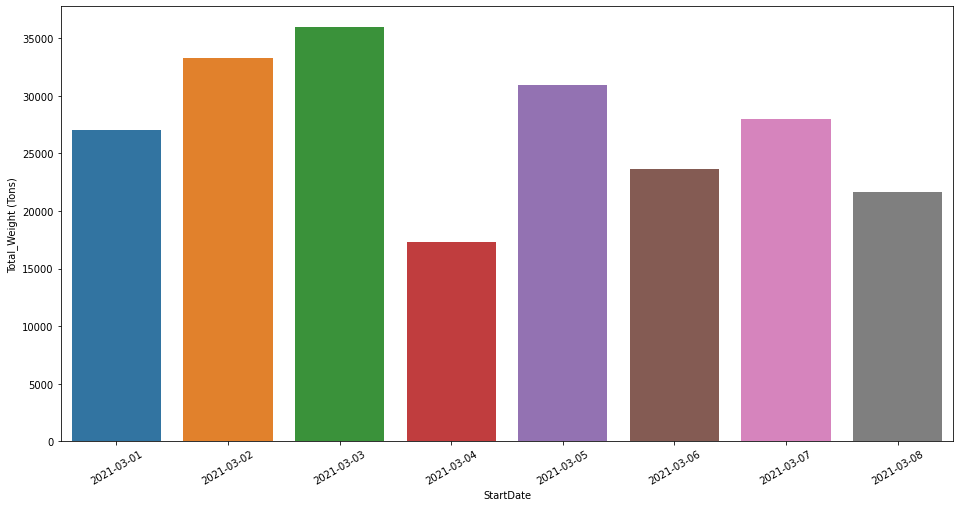

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_pivot['StartDate'],y=df_pivot['Total_Weight (Tons)'])
plt.xticks(rotation=30)
plt.savefig('Total_Weight (Tons)')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2021-03-01'),
  Text(1, 0, '2021-03-02'),
  Text(2, 0, '2021-03-03'),
  Text(3, 0, '2021-03-04'),
  Text(4, 0, '2021-03-05'),
  Text(5, 0, '2021-03-06'),
  Text(6, 0, '2021-03-07'),
  Text(7, 0, '2021-03-08')])

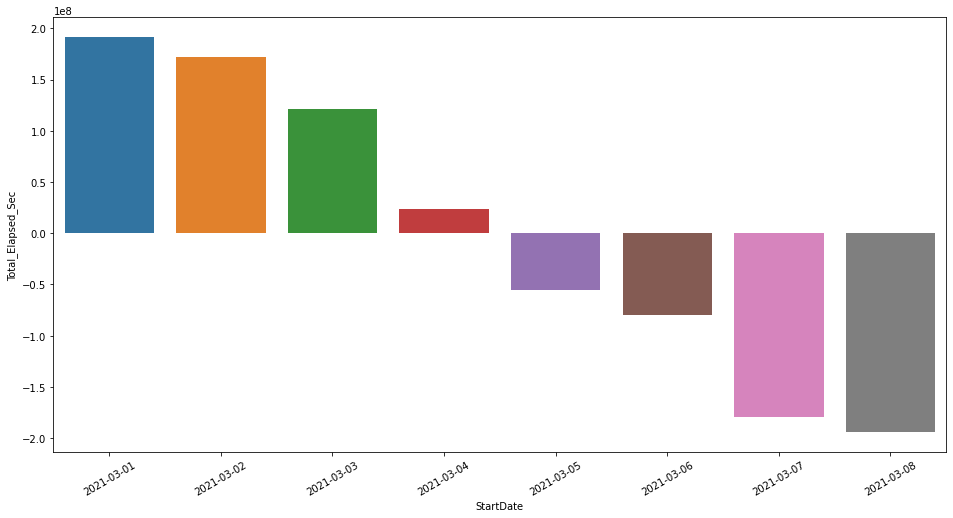

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_pivot['StartDate'],y=df_pivot['Total_Elapsed_Sec'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2021-03-01'),
  Text(1, 0, '2021-03-02'),
  Text(2, 0, '2021-03-03'),
  Text(3, 0, '2021-03-04'),
  Text(4, 0, '2021-03-05'),
  Text(5, 0, '2021-03-06'),
  Text(6, 0, '2021-03-07'),
  Text(7, 0, '2021-03-08')])

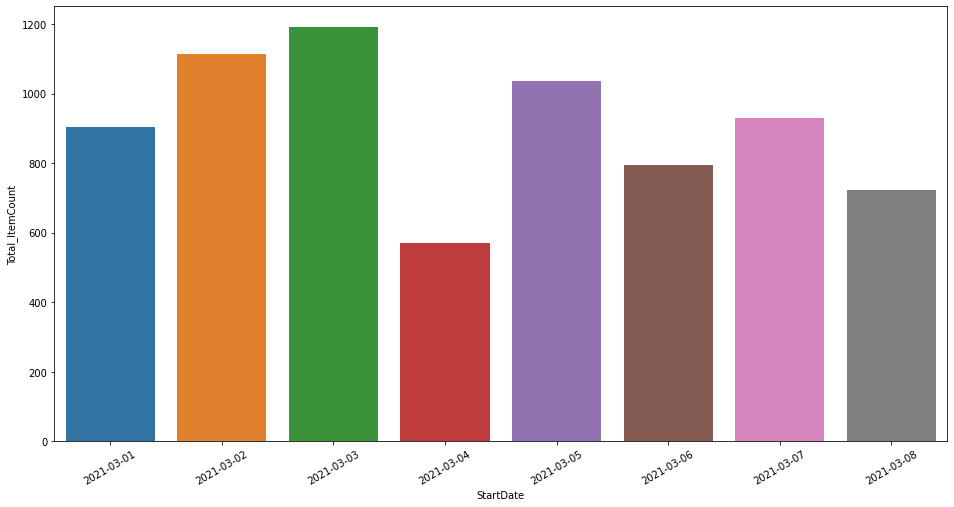

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_pivot['StartDate'],y=df_pivot['Total_ItemCount'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2021-03-01'),
  Text(1, 0, '2021-03-02'),
  Text(2, 0, '2021-03-03'),
  Text(3, 0, '2021-03-04'),
  Text(4, 0, '2021-03-05'),
  Text(5, 0, '2021-03-06'),
  Text(6, 0, '2021-03-07'),
  Text(7, 0, '2021-03-08')])

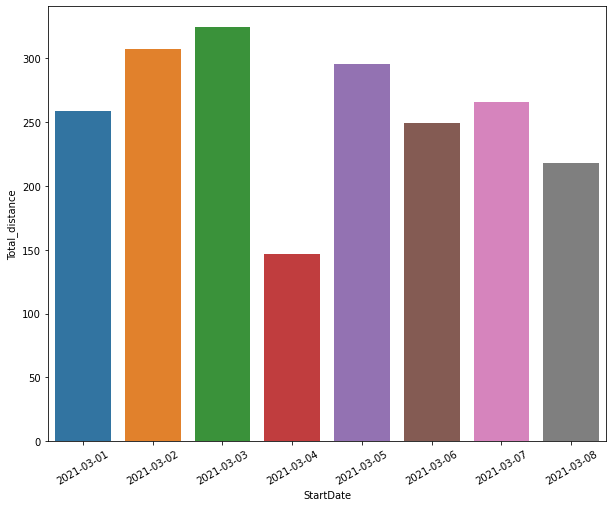

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_pivot['StartDate'],y=df_pivot['Total_distance'])
plt.xticks(rotation=30)

In [37]:
df=df_pivot.copy()
hover_text = {}
fields = ['Total_Weight (Tons)', 'Total_Elapsed_Sec', 'Total_ItemCount', 'Total_distance']
for i in fields:
    txt=[]
    for j in range(df[i].shape[0]-1):
        
        val=(df[i][j+1]-df[i][j])/df[i][j]
        if val>0.40:
            txt.append(f'From {df["StartDate"][j]} to {df["StartDate"][j+1]} it increased {round(val*100,2)} %')
        if val<-0.40:    
            txt.append(f'From {df["StartDate"][j]} to {df["StartDate"][j+1]} it decreased {round(val*100,2)} %')
    hover_text[i]=txt

In [41]:
(df["Total_distance"][4]-df["Total_distance"][3])/df["Total_distance"][3]

1.0146885675970676

In [42]:
hover_text

{'Total_Weight (Tons)': ['From 2021-03-03 to 2021-03-04 it decreased -51.91 %',
  'From 2021-03-04 to 2021-03-05 it increased 78.75 %'],
 'Total_Elapsed_Sec': ['From 2021-03-03 to 2021-03-04 it decreased -80.26 %',
  'From 2021-03-04 to 2021-03-05 it decreased -331.24 %',
  'From 2021-03-05 to 2021-03-06 it increased 44.93 %',
  'From 2021-03-06 to 2021-03-07 it increased 123.92 %'],
 'Total_ItemCount': ['From 2021-03-03 to 2021-03-04 it decreased -52.14 %',
  'From 2021-03-04 to 2021-03-05 it increased 81.93 %'],
 'Total_distance': ['From 2021-03-03 to 2021-03-04 it decreased -54.81 %',
  'From 2021-03-04 to 2021-03-05 it increased 101.47 %']}

In [53]:
df.head()

,machine_id,event_id,events_name1,StartDate,start,start_latitude,start_longitude,events_name2,stop,stop_latitude,stop_longitude,Elapsed_Sec,distance,ItemCount,Weight (Tons)
Sno,,,,,,,,,,,,,,,
0,QC001,930,PICK,2021-03-01,2021-03-01 00:09:17.737,-37.66171,176.16986,PLACE,2021-03-01 00:12:45.736000,-37.65978,176.17058,207.999,0.2234,1,36
1,QC001,931,PICK,2021-03-01,2021-03-01 00:19:28.734,-37.66162,176.16988,PLACE,2021-03-01 00:22:36.735000,-37.66371,176.16962,188.001,0.2331,1,27
2,QC001,932,PICK,2021-03-01,2021-03-01 00:27:40.736,-37.66180,176.16984,PLACE,2021-03-01 00:32:08.734001,-37.66428,176.17333,267.998,0.4130,1,37
3,QC001,933,PICK,2021-03-01,2021-03-01 00:36:53.733,-37.66216,176.16977,PLACE,2021-03-01 00:39:10.736000,-37.66344,176.17103,137.003,0.1804,1,37
4,QC001,934,PICK,2021-03-01,2021-03-01 00:42:01.736,-37.66665,176.17189,PLACE,2021-03-01 00:46:15.737000,-37.66219,176.16977,254.001,0.5292,1,38


In [58]:
df1=df.groupby(['machine_id','StartDate'])[['Elapsed_Sec',	'distance',	'ItemCount',	'Weight (Tons)']].sum()
df_pivot=df1.pivot_table(index='StartDate',columns='machine_id',values=['Elapsed_Sec','distance',	'ItemCount',	'Weight (Tons)'])
features=set([i[0] for i in df_pivot.columns.values.tolist()])
for i in features:
    data=[]
    for j in df_pivot.index:
        data.append(df_pivot.loc[j,(i,slice(None))].sum())
    df_pivot['Total_'+i]=data

In [21]:
df1=df.groupby(['machine_id','StartDate'])[['Elapsed_Sec',	'distance',	'ItemCount',	'Weight (Tons)']].sum().loc['QC001',:]
df1.loc['Total']=df1.sum(axis=0)

In [22]:
df1

,Elapsed_Sec,distance,ItemCount,Weight (Tons)
StartDate,,,,
2021-03-01 00:00:00,3.272300e+04,59.6796,230.0,6876.0
2021-03-02 00:00:00,3.277304e+04,56.7465,228.0,6849.0
2021-03-03 00:00:00,3.164925e+07,92.9348,373.0,11153.0
2021-03-04 00:00:00,1.912466e+07,108.0018,410.0,12459.0
2021-03-05 00:00:00,3.517800e+04,49.6931,198.0,5902.0
2021-03-06 00:00:00,3.081696e+04,54.0376,186.0,5500.0
2021-03-07 00:00:00,2.432702e+04,31.4788,162.0,4919.0
2021-03-08 00:00:00,-4.921109e+07,56.6172,210.0,6250.0
Total,1.718640e+06,509.1894,1997.0,59908.0


In [35]:
df1=df.groupby(['machine_id','StartDate'])[['Elapsed_Sec',	'distance',	'ItemCount',	'Weight (Tons)']].sum().loc['QC001',:]
df1.loc['Total']=df1.sum(axis=0)
total=df1.loc['Total']

In [37]:
total.to_dict()

{'Elapsed_Sec': 1718640.129000008,
 'distance': 509.1894000000001,
 'ItemCount': 1997.0,
 'Weight (Tons)': 59908.0}